# Brief Primer on Descriptive Statistics
## Athlete Statistics at the 2016 Rio Olympics

This notebook serves as a very basic primer on Desrciptive Statistics and will explain concepts which are fundamental to understanding Inferential Statistics, its tools and techniques. More specifically, we will be looking at athlete data from the 2016 Rio Olympics and experimenting with the various theories of statistics explained in the slides.

The dataset was obtained from Kaggle (https://www.kaggle.com/rio2016/olympic-games#_=_) and was uploaded by Rio 2016.

## Importing Libraries and loading the data

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
files.upload()

In [0]:
df = pd.read_csv('athletes.csv')
df.head()

## Central Tendencies

The central tendencies are values which represent the central or 'typical' value of the given distribution. The three most popular central tendency estimates are the mean, median and mode. Typically, in most cases, we resort to using mean (for normal distributions) and median (for skewed distributions) to report central tendency values.

A good rule of thumb is to use mean when outliers don't affect its value and median when it does (Bill Gates joke, anyone?).

Calculating the mean and median are extremely trivial with Pandas. In the following cell, we have calculated the mean and median of the athlete heights in the 2016 Olympics. As we can see below, the mean and the median are almost equal. 

In [0]:
heights = df['height']
heights.mean(), heights.median()

## Measures of Spread
Apart from the central or typical value of the data, we are also interested in knowing how much the data spreads. That is, how far from the mean do values tend to go. Statistics equips us with two measures to quantitatively represent the spread: the variance and the standard deviation. They are dependent quantities, with the standard deviation being defined as the square root of variance.

As above, calculating the standard deviation (and variance) is trivial with Pandas as can be seen below.

In [0]:
heights.std(), heights.var()

The mean and the standard deviation are often the best quantities to summarize the data for distributions with symmetrical histograms without too many outliers. As we can see from the histogram below, this indeed is the case for athlete heights. Therefore, the mean and the standard deviation measures are sufficient information and other tendencies such as the median does not add too much of extra information.

In [0]:
heights = heights.fillna(heights.mean())
sns.distplot(heights)

## The Normal Distribution

The normal distribution is probably the most important and commonly occuring distribution in nature. The normal distribution was first arrived at by De Moivre when he was trying to come up with a continuous approximation to binomial distributions with p = 0.5. 

Let us now simulate a similar experiment as above. Let us sample a 1000 points from a normal distribution and plot the number of occurences in the form of a histogram.

In [0]:
outcomes = []
for i in range(1000):
    point = np.random.normal(0, 1)
    outcomes.append(point)

sns.distplot(outcomes)

A major reason for the ubiquity of the Normal Distribution has to do with the **Central Limit Theorem**. Naively stated, data that are affected by small and independent effects tend to be normally distributed. Since this is true for most of the attributes found in nature, the normal distribution is ubiquitously observed.

## Normal Tests

We had stated earlier that heights and weights are approximately normally distributed. But how do we know this? To put it more generally, given a sample, how can we test if the distribution is normal?

This is usually done in two ways:
* **Histograms**: We have already covered this in a previous section. If the distribution shape is like a bell curve, we can be reasonably sure that it is normal.
* **Normal Test**: The Scipy package gives us a very handy normaltest method that lets us calculate the probability that the distrbution is normal, by chance.

Let us now check for the normalcy of the athlete weights in our dataset.

In [0]:
weights = df['weight']
weights = weights.fillna(weights.mean())

sns.distplot(weights)

In [0]:
stats.normaltest(weights)

As can be seen above, the weights in our dataset are not normally distributed. The histrogram plot does not exactly resemble a bell curve and the normal test gives a p-value of 0, which means that there almost no chance that the distribution is normal.

This observation of Olympic athlete weights is pretty interesting as human weights, in general, tend to be normally distributed.

## Z-Score and P-Value

The z-score and p-value are central to almost every statistical inference tool and hypothesis testing methods. The Z-score is measure of how many standard deviations away from the mean, a particular sample point is. The p-value gives us the probability that of getting a z-score less than or equal to the given z-score and in a sense, is a measure of the number of sample points that have a z-score less than or equal to the corresponding value of z.

The Scipy package gives us two very useful functions to get the p-value for a given z-score and vice versa. The code below tries to calculate the number of sample points that fall within one, two and three standard deviations from the mean.

In [0]:
def pvalue(z):
    return 1 - 2 * (1 - stats.norm.cdf(z))

In [0]:
pvalue(1), pvalue(2), pvalue(3)

In [0]:
def zscore(frac):
    return stats.norm.ppf(0.5 + frac/2)

In [0]:
zscore(0.50), zscore(0.68), zscore(0.99)

# Sampling

In almost every field of study (natural sciences, politics, computer science), we often need statistics about our data. But more often than not, it is simply too impractical to gain all possible information to arrive at our summary and conclusions. For example, if we wanted to predict election results, it would be impractical to gather preference data from every eligible voter in the country. 

In such cases, we have to resort to cheaper methods that are more feasible. One such method is to gather data of a small fraction of the population that you believe represents the entire population well. The statistics gathered from this fraction of people would then be reflective of the population as a whole. This is called sampling.

The Credit Card Fraud Detection dataset has been obtained from Kaggle courtesy Andrea and is available at https://www.kaggle.com/dalpozz/creditcardfraud.

![alt text](https://miro.medium.com/max/254/0*o0NliEWAfYeZ0WHZ.jpg)

In [0]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [0]:
import pandas as pd
url='https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv'
df = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
df.describe()

In [0]:
df.shape

## Estimating a Population Proportion

In the following sections, we are going to try and find the fraction of transactions that are fraudalent by examining data from only 5% of the sample. 

In [0]:
df_samp = df.sample(frac=0.05)

In [0]:
df_samp['Class'].value_counts()

In [0]:
p_hat = len(df_samp[df_samp['Class'] == 1]) / len(df_samp)
p_hat

The value of p_hat obtained above is the fraction of fraudalent transactions in the random sample that Pandas gave us. But how is this p_hat value related to the real fraction p?

Imagine that we didn't have the data for all the credit card transactions as we do now. How would we go about estimating the real fraction from the results of this small sample? As you may have guessed, it really isn't possible to determine the exact fraction with 100% accuracy. What we can do, though, is define a confidence interval and quantitatively state that we are this much confident that the real fraction is within a particular range. In doing so, we shift from a deterministic realm to the stochastic realm of samples governed by probabilities.

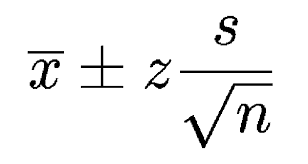

![alt text](https://miro.medium.com/max/742/0*fAdTwLXc7S3X44CW.jpg)

In statistics, a confidence interval is a type of interval estimate, computed from the statistics of the observed data, that might contain the true value of an unknown population parameter.

The p_hat that we obtained in a previous step is a random variable whose value will change in different trials of the experiment (sampling 5% of the population).
Let's say that we conduct this experiment 1000 times. How will the p_hat obtained in each experiment be related to each other? Let's simulate the experiment, plot the distribution and find out.

In [0]:
p_hat_samples = []
for i in range(1000):
    sample = df.sample(frac=0.05)
    p_sample = len(sample[sample['Class'] == 1]) / len(sample)
    p_hat_samples.append(p_sample)

In [0]:
sns.distplot(p_hat_samples)

As can be seen above, the $\hat{p}$'s are in the form of a normal distribution.  Without proof, we will present the following results:

* E[$\hat{p}$] = p.
* $\hat{\sigma}$ = $\sqrt{\frac{p(1-p)}{n}}$
* The distribution becomes normal with p as the mean as n approaches infinity.

Therefore, the accuracy of our value is only dependent on the spread of our $\hat{p}$. Since p is deterministic, we can say that it is dependent only on the sample size, n. The accuracy of our estimates is therefore determined by $\frac{1}{\sqrt{n}}$

## Reporting our results

The sample size determines the accuracy of our results. As mentioned earlier, we can never be 100% accurate with our results. We can only be confident to a certain level. From our previous notebook, we learnt about z-scores and p-values. We know that 68% of the values fall within one standard deviation.

From this, we can directly say that the real value p falls within $\hat{p}$ + $\hat{\sigma}$ and $\hat{p}$ - $\hat{\sigma}$ and we can state this with 68% certainty.

But what if we wanted a 99% certainty (or confidence level)?

In [0]:
def zscore(frac):
    return stats.norm.ppf(0.5 + frac/2)

In [0]:
z = zscore(0.99)
z

The above result tells us that 99% of the values fall within 2.575 standard deviations.

In [0]:
p_hat

In [0]:
sigma_hat = np.sqrt((p_hat * (1- p_hat))/len(df_samp))
sigma_hat

In [0]:
lower_limit = p_hat - z*sigma_hat
upper_limit = p_hat + z*sigma_hat
lower_limit, upper_limit

From the above result, we can directly state that we are 99% confident that the real p lies within (0.00069716474925151251, 0.0023927228911979257).

We can now present the following results:
* There is a tradeoff between confidence level and range size. Higher the confidence, larger the range.
* Increasing the sample size will lead to a reduced standard deviation and therefore, more accurate and practically significant results.

Finally let us check if our results tally with what we've suggested.

In [0]:
p = len(df[df['Class'] == 1])/len(df)
p

The value of p does indeed fall between the above range.

Finally, let us check on the mean of the $\hat{p}$'s we obtained from simulating the experiment a 1000 times. From our results, we know that this mean will approach p as n approaches infinity. Therefore, we should be reasonably confident that this mean is extremely close to the value of p.

In [0]:
expected_p = pd.Series(p_hat_samples).mean()
expected_p

## Estimating the average weight of Women Olympians

In the following sections, we will try and estimate the mean of the weights of female olympic athletes by taking a fraction of the data (artificially creating a sample). Estimation of the population mean is extremely similar to estimating the population proportion as is demonstrated below.

In [0]:
from google.colab import files
files.upload()

In [0]:
df2 = pd.read_csv('athletes.csv')
df2.head()

In [0]:
df2 = df2[df2['sex'] == 'female']
df2.head()

In [0]:
df2.shape

In [0]:
df2_samp = df2.sample(frac=0.1)
df2_samp.shape

In [0]:
mean_hat = df2_samp['weight'].mean()
mean_hat

Unlike the previous case, we are not dealing fractions but means. How will the $\hat{\mu}$'s be distributed? Turns out, they will be normally distributed as well! This famous result is known as the **Central Limit Theorem**. 

What is brilliant about this result is its complete lack of regard for the distribution of the original data. It doesn't matter how the data is related to one another; their sampled means will always be normally distributed. Like in the proportions case, let us simulate an experiment to visualise this result.

In [0]:
mean_hat_samples = []
for i in range(1000):
    sample = df2.sample(frac=0.1)
    mean_sample = sample['weight'].mean()
    mean_hat_samples.append(mean_sample)

In [0]:
sns.distplot(mean_hat_samples)

In [0]:
stats.normaltest(mean_hat_samples)

The sampled means are indeed normally distributed as can be seen above. Let us now continue with our analysis of estimating the population mean.

In [0]:
std_hat = df2_samp['weight'].std()/np.sqrt(len(df2_samp))
std_hat

For a change, let us calculate the confidence interval at a 95% confidence level this time.

In [0]:
z = zscore(0.95)
z

In [0]:
lower_limit = mean_hat - z*std_hat
upper_limit = mean_hat + z*std_hat

lower_limit, upper_limit

We can now report that we are 95% confident that the average weight of female Olympians is within the above range

Let us check our result with the actual mean.

In [0]:
df2['weight'].mean()

62.6444 does indeed fall between the above range. A general point to be noted is that the greater the confidence level, the greater the probability that the real value is in the range offered.

## The T-Statistic

The Student’s t-distribution is similar to the normal distribution, except it is more spread out and wider in appearance, and has thicker tails. The differences between the t-distribution and the normal distribution are more exaggerated when there are fewer data points, and therefore fewer degrees of freedom.

The t-statistic is the ideal score to use for sample sizes lesser than 30. For sample sizes greater than 30, t and z scores are essentially the same.

![alt text](https://miro.medium.com/max/574/1*LlBltIwkHXx6CgncSB_Oiw.png)

## Central Limit Theorem Test on Non Normal Distributions

Let us check the merit of the central limit theorem by testing it on a non normal distribution.

In [0]:
non_normal = pd.Series(np.random.randint(1000, size=1000))
sns.distplot(non_normal)

This is clearly not normal. Now, let us try to simulate our little experiment on this distribution.

In [0]:
sns.distplot([non_normal.sample(frac=0.1).mean()  for i in range(1000)])

# Hypothesis Testing

![alt text](https://miro.medium.com/max/910/1*4c72kKs77I7nJmGtYq3dkw.png)

## One Sample Significance Tests



The purpose of One Sample Significance Tests is to check if a sample of observations could have been generated by a process with a specific mean or proportion.

Some questions that can be answered by one sample significance tests are:
* Is there equal representation of men and women in a particular industry?
* Is the normal human body temperature 98.6 F?

We will try and apply this test to a few real world problems in this notebook.

The Suicide dataset was obtained from Kaggle courtesy Rajanand Illangovan. You can download it here: https://www.kaggle.com/rajanand/suicides-in-india

### Analyzing Suicides in India by Gender

Are men as likely to commit suicide as women?

This is the question we will attempt at answering in this section. To answer this question, we will use suicide statistics shared by the National Crime Records Bureau (NCRB), Govt of India. To perform this analysis, we need to know the sex ratio in India. The Census 2011 report states that there are 940 females for every 1000 males in India.

Let p denote the fraction of women in India.

In [0]:
p = 940/(940+1000)
p

If there is no correlation between gender and suicide, then the sex ratio of people committing suicides should closely reflect that of the general population. 

Let us now get our data into a Pandas dataframe for analysis.

In [0]:
import pandas as pd
url='https://raw.githubusercontent.com/SankBad/GraduateSpecialistRutgers/master/suicides.csv'
df = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
df.head()

In [0]:
df.shape

In [0]:
df['Gender'].value_counts()

We can see that the number of female suicides is slightly lesser than the number of male suicides. There are also fewer females than males. How do we prove that females are as likely to commit suicide as males? This can be answered through hypothesis testing.|

#### Step 1: Formulate the hypothesis and decide on confidence level

The null hypothesis, as stated in the slides, is the default state. Therefore, I will state my null and alternate hypothesis as follows.

* **Null Hypothesis (H0)**: Men and women are equally likely to commit suicide.
* **Alternate Hypothesis (H1)**: Men and women are not equally likely to commit suicide.

If the null hypothesis is true, it would mean that the fraction of women committing suicide would be the same as the fraction of women in the general population. We now need to use a suitable statistica test to find out if this is indeed is the case.

Our statistical test will generate a p-value which has to be compared to a significance level ($\alpha$). If p is less than alpha, then it is extremely unlikely that the event must have occurred by chance and we would be reasonable in rejecting the null hypothesis. On the contrary, if the p-value is higher than $\alpha$, we will not be in a position to reject the null hypothesis.

Let us assume, $\alpha$ = 0.05

#### Step 2: Decide on the Statsitical Test

We will be using the One Sample Z-Test here. 

#### Step 3: Compute the p-value

In [0]:
h0_prop = p
h0_prop

In [0]:
h1_prop = df['Gender'].value_counts()['Female']/len(df)
h1_prop

In [0]:
sigma_prop = np.sqrt((h0_prop * (1 - h0_prop))/len(df))
sigma_prop

In [0]:
z = (h1_prop - h0_prop)/sigma_prop
z

In [0]:
def pvalue(z):
    return 2 * (1 - stats.norm.cdf(z))

In [0]:
p_val = (1-stats.norm.cdf(z))*2
p_val

The p value is so small that Python has effectively rounded it to zero.

#### Step 4: Comparison and Decision

The p value obtained is extremely strong evidence to suggest that it is much lower than our significance level $\alpha$. We can thus safely disregard the null hypothesis and accept the alternate hypothesis (since it is the negation of the null hypothesis).

**Men and women are not equally likely to commit suicide.**

Note that this test says nothing about if men are more likely than women to commit suicide or vice versa. It just states that they are not equally likely. The reader is encouraged to form their own hypothesis tests to check these results.

### Analyzing the average heights of NBA Players

I was interested in knowing the average height of NBA playes. A quick Google search tells me that the average height of players between 1985-2006 was **6'7"** or 200.66 cm. Is this still the case?

To answer this question, we will be using the NBA Players Stats - 2014-2015 dataset on Kaggle courtesy DrGuillermo. The dataset can be downloaded here: https://www.kaggle.com/drgilermo/nba-players-stats-20142015

In [0]:
from google.colab import files
files.upload()

In [0]:
df2 = pd.read_csv('players_stats.csv')
df2.head()

In [0]:
df2.shape

#### Hypothesis Testing

One Sample Significance Test for Mean is extremely similar to that for Proportion. We will go through almost an identical process.

The hypotheses are defined as follows:
* **Null Hypothesis**: The average height of an NBA player is 200.66 cm.
* **Alternate Hypothesis**: The average height of an NBA player is not 200.66 cm.

Significance Level, $\alpha$ is at 0.05. Assuming Null Hypothesis to be true.

In [0]:
h0_mean = 200.66

In [0]:
h1_mean = df2['Height'].mean()
h1_mean

In [0]:
sigma = df2['Height'].std()/np.sqrt(len(df2))
sigma

In [0]:
z = (h1_mean - h0_mean)/sigma
z

In [0]:
p_val = (1 - stats.norm.cdf(abs(z))) * 2
p_val

The p value obtained is much lesser than the significance level $\alpha$. We therefore reject the null hypothesis and accept the alternate hypothesis (the negation). We can therefore arrive at the following conclusion from this analysis:

**The average height of NBA Players is NOT 6'7"**.